# Detecting Spam Emails Using Tensorflow in Python

we will build a spam email detection model that classifies emails as Spam or Ham (Not Spam) using TensorFlow, one of the most popular deep learning libraries.

## Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Dataset

In [2]:
!wget https://raw.githubusercontent.com/fatahrahimi330/100-Machine-Learning-Projects/refs/heads/master/1-Detecting%20Spam%20Emails/spam_ham_dataset.csv

--2026-02-28 04:39:44--  https://raw.githubusercontent.com/fatahrahimi330/100-Machine-Learning-Projects/refs/heads/master/1-Detecting%20Spam%20Emails/spam_ham_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5502589 (5.2M) [text/plain]
Saving to: ‘spam_ham_dataset.csv’

spam_ham_dataset.cs 100%[===================>]   5.25M  20.7MB/s    in 0.3s    

2026-02-28 04:39:46 (20.7 MB/s) - ‘spam_ham_dataset.csv’ saved [5502589/5502589]



In [3]:
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape # we have 5171 rows and 4 columns in our dataset

(5171, 4)

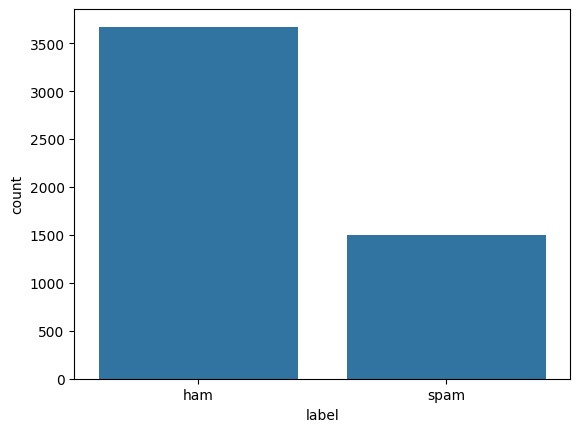

In [5]:
# let's visualize the target or label to see the data distribution
sns.countplot(x="label", data=df)
plt.show()

## Step 3: Balance the Dataset

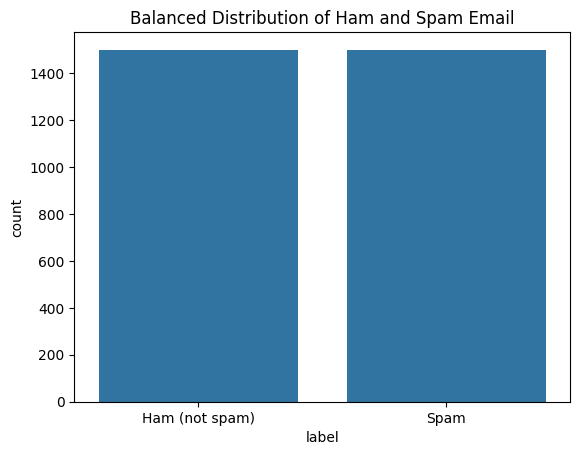

In [6]:
# we have inbalance data, that's why we are going to balance it using undersampling method
df_ham = df[df["label"]=="ham"]
df_spam = df[df["label"]=="spam"]

# now let's downsample the ham to match with spam
df_ham_balanced = df_ham.sample(n = len(df_spam) ,random_state=42)

# now let's combine the balanced ham with spam
df_balanced = pd.concat([df_ham_balanced, df_spam]).reset_index(drop=True)

# let's visualize the balanced dataset
sns.countplot(x="label", data=df_balanced)
plt.title("Balanced Distribution of Ham and Spam Email")
plt.xticks(ticks=[0, 1], labels=["Ham (not spam)", "Spam"])
plt.show()



In [7]:
df_balanced.shape, 5171 - 2998

((2998, 4), 2173)

## Step 4: Clean the Text
Time to clean the text that is our feature for predicting the label, 3 steps:
- 1: Removing Punctuation
- 2: First Removing Stopwords
- 3: Stemming or Lemmatization

In [8]:
# in text we have a word "Subject", we should remove it
df_balanced["text"] = df_balanced["text"].str.replace("Subject","")
df_balanced

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0
...,...,...,...,...
2993,4381,spam,: pictures\r\nstreamlined denizen ajar chased\...,1
2994,4979,spam,: penny stocks are about timing\r\nnomad inter...,1
2995,4162,spam,: anomaly boys from 3881\r\nuosda apaproved ml...,1
2996,4365,spam,: slutty milf wants to meet you\r\ntake that !...,1


In [9]:
# 1) the first step is to remove the punctuation
import string

def remove_punctuation(text):

    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df_balanced["text"] = df_balanced['text'].apply(lambda x: remove_punctuation(x))
df_balanced.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [13]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 72.0 MB/s eta 0:00:00:00:0100:01


In [16]:
# 2) the second step is to remove the stopwords
from gensim.parsing.preprocessing import remove_stopwords
df_balanced['text'] =df_balanced['text'].apply(lambda x : remove_stopwords(x))
df_balanced.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren m sure help t know as...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  s power ...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 i...,0


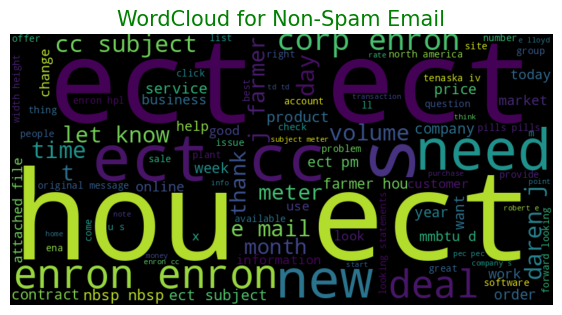

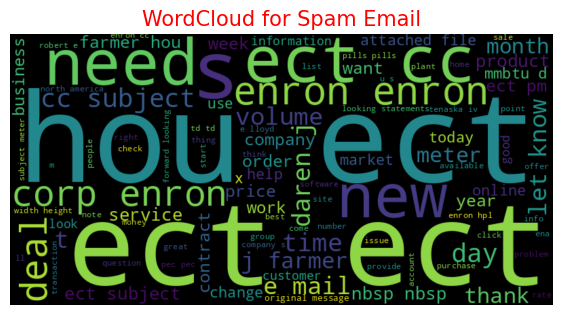

In [37]:
# let's visualize the words using wordcloud technique
from wordcloud import WordCloud

def plot_word_cloud(text,typ):
    email_corpus = " ".join(df_balanced['text'])
    wc = WordCloud(background_color="black", max_words = 100, width=800, height=400).generate(email_corpus)
    plt.figure(figsize=(7, 7))
    plt.imshow(wc, interpolation='bilinear')
    color = 'r' if typ == "Spam" else 'g'
    plt.title(f"WordCloud for {typ} Email", fontsize=15, color = color)
    plt.axis('off')
    plt.show()

plot_word_cloud(text = df_balanced['label'] == 'ham', typ='Non-Spam')
plot_word_cloud(text=df_balanced['label']== 'spam', typ='Spam')

## Step 6: Tokenization and Padding
- 1) Tokenization: converts each word to unique integer
- 2) Padding: make sure all text sequence have the same length for modeling

In [ ]:
# 1) Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['text'], 
    df_balanced['label'], 
    test_size=0.2, 
    random_state=42
    )

# 2) Tokenize
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# 3) Padding
train_sequences = tf.keras.utils.pad_sequences(
    train_sequences,
    maxlen = 100, 
    padding ="post", 
    truncating="post"
    )

test_sequences = tf.keras.utils.pad_sequences(
    test_sequences, 
    maxlen = 100, 
    padding='post', 
    truncating= 'post'
    )

y_train = (y_train == "spam").astype(int)
y_test = (y_test== "spam").astype(int)

## Build the Model

In [61]:
# let's build our model using sequenial architechture
model = tf.keras.models.Sequential([
    # 0) Input Layer
    tf.keras.layers.Input(shape=(100,)),
    # 1) Embedding Layer: make vector of words
    tf.keras.layers.Embedding(input_dim=len(tokenizer.index_word) + 1, output_dim= 32),
    # 2) LSTM Layer: capture pattern in sequences
    tf.keras.layers.LSTM(16),
    # 3) Fully Connected Layer: Extracts Features
    tf.keras.layers.Dense(32, activation="relu"),
    # 4) Output Layer: predict the output (spam or not)
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# let's compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 32)        │     1,269,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,273,025 (4.86 MB)

 Trainable params: 1,273,025 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

## Fit the Model

In [ ]:
es = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_accuracy', restore_best_weights = True)
lr = tf.keras.callbacks.ReduceLROnPlateau(patience= 3, monitor ='val_loss', factor = 0.5, verbose =0)

history = model.fit(train_sequences, y_train,
                    validation_data = (test_sequences, y_test),
                    epochs = 20,
                    batch_size = 32,
                    callbacks =[lr, es]
                    )

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9750 - loss: 0.1128 - val_accuracy: 0.9717 - val_loss: 0.1374 - learning_rate: 1.2500e-04
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9754 - loss: 0.1105 - val_accuracy: 0.9733 - val_loss: 0.1314 - learning_rate: 1.2500e-04
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9679 - loss: 0.1326 - val_accuracy: 0.9733 - val_loss: 0.1324 - learning_rate: 1.2500e-04
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9807 - loss: 0.0877 - val_accuracy: 0.9733 - val_loss: 0.1328 - learning_rate: 1.2500e-04
Epoch 5/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9810 - loss: 0.0883
Epoch 5: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9810 - loss: 0.0884 - val_accuracy: 0.9733 - val_loss: 0.1330 - learning_rate: 1.2500e-04


In [54]:
test_loss, test_accuracy = model.evaluate(test_sequences, y_test)
print(f"Test Loss: {test_loss:.2}")
print(f"Test Accuracy: {test_accuracy:.2}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9633 - loss: 0.1539
Test Loss: 0.15
Test Accuracy: 0.96


## Plot Train and Test Accuracy

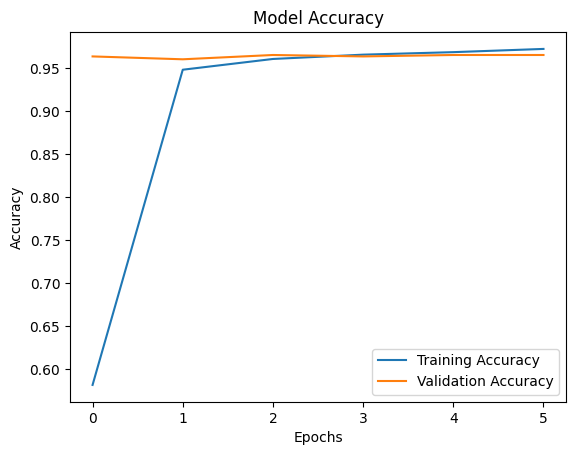

In [55]:
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot Train and Test Loss

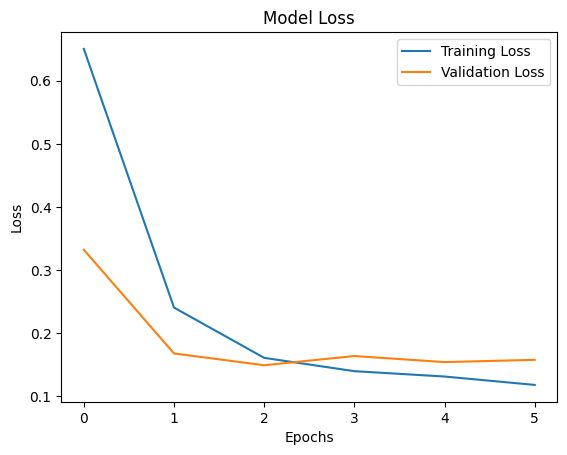

In [56]:
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()